<a href="https://colab.research.google.com/github/LailaDuffy/WoTech_Python/blob/main/WoTech_Python_Lesson17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the data

In [4]:
import pandas as pd

advertising = pd.read_csv('/content/tvmarketing.csv')
advertising.head()
advertising.describe()
# TV column - advertising budget spent on TV marketing
# Sales - revenue from sales

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

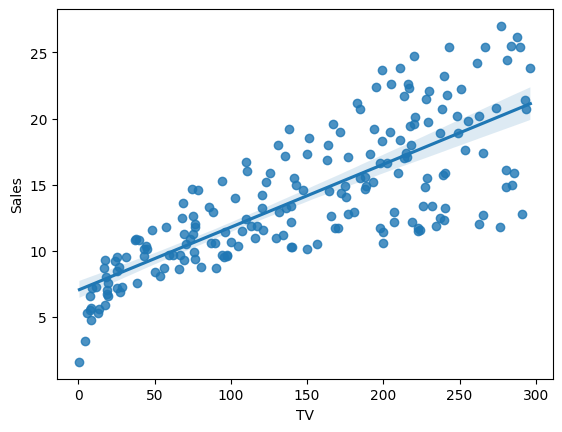

In [5]:
import seaborn as sns

sns.regplot(x='TV', y='Sales', data=advertising)

In [6]:
# Pearson correlation coefficient
advertising.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [7]:
advertising['TV'].corr(advertising['Sales'])

0.7822244248616061

## SUPERVISED VS UNSUPERVISED TRAINING/LEARNING

![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

### Supervised learning
#### Data is labelled
#### The outcome is known, predefined, e.g. x and y values where x is independent value and y is predefines dependant value, all values are known
####There are other types of supervised learning, not just Linear Regression

### Unsupervised learning
#### Data is not labelled
#### The outcome is not predefined, e.g. grouping data in clusters by a certain properties


## Training a Linear Regression Model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [10]:
# Preparing X and Y (should be arrays of 1 X and 1 Y column in each array)

X = advertising.drop('Sales', axis=1) # X axis, independent variable
# axis=1 means 1 whole column is dropped ('Sales' column)
Y = advertising.drop('TV', axis=1) # Y axis, dependent outcome variable

### Splitting dataFrame in Train/Test sets

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42) # capital X, lowercase y to show independent and dependent variables
# 0.7 means 70% random data from the set will be used for training and remaining 30% used for testing the model
# random state defines that the data for training and date for testing won't be random everytime, but same

### Perform Linear Regression - Train the Model

In [17]:
# Column is also called a FEATURE
# Row is also called an OBSERVATION

from sklearn.linear_model import LinearRegression # import the model
model = LinearRegression() # initialize the model
model.fit(X_train, y_train) # fir the model to the training data sets(X_train, y_train)

LinearRegression()

In [19]:
# Y = mX + b #

print(f'Model intercept is {model.intercept_}') # it means if there is no TV advertising, the Sales would be 7 (EUR)
print(f'Model coefficient is: {model.coef_}')


Model intercept is [7.00596126]
Model coefficient is: [[0.04947856]]


### Using Model to Predict Sales on new TV advertising budget

In [24]:
my_new_budget = [[150]] # double [[]] create a 2D array dataset

my_predicted_sales = model.predict(my_new_budget)

print(f'When the budget is {my_new_budget[0][0]}, then the predicted sales are {round(my_predicted_sales[0][0],2)}')

When the budget is 150, then the predicted sales are 14.43


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Testing the Model

In [30]:
y_predict = model.predict(X_test)

final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual Sales'] = y_test
final_df['Predicted Sales'] = y_predict

# Calculate the absolute error of the actual vs predicted sales figures
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual Sales']-final_df['Predicted Sales'])
final_df.head()

,TV,Actual Sales,Predicted Sales,ABS_Error_Actual_vs_Predicted
52,216.4,22.6,17.713122,4.886878
74,213.4,17.0,17.564686,0.564686
80,76.4,11.8,10.786123,1.013877
143,104.6,10.4,12.181419,1.781419
20,218.4,18.0,17.812079,0.187921


# TEAMWORK

Task: This is a complicated topic, teamwork is to look at scikit-learn library together. Suggested questions to discuss:

What is an error rate?

Where you could use other machine-learning models?

What is the difference between supervised and unsupervised training?

How to import different models from the scikit-learn package?

How can you evaluate the performance of a machine learning model in scikit-learn?

What metrics are commonly used for evaluation?

What is model overfitting, and how can it be prevented?

## Error rate
### Error rate is a performance metric that quantifies the proportion of incorrect predictions made by a model. It is a measure of how often the model's predictions differ from the actual labels or outcomes.

## Other machine learning models
### Classification - Healthcare, Finance, Manufacturing
###